# TUTORIAL 5

In [2]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

### The goal of this tutorial is to see Monte Carlo integration in action.
### For simplicity we stick to one dimension, although Monte Carlo integration becomes only powerful for higher dimensions.

### Recall that if we generate a large number $(n)$ of uniformly distributed random points $x_{1}, x_{2}, \cdots, x_{n}$ in $[a,b]$  , $$
(b-a) \frac{1}{n}\sum_{i=1}^{n} f(x_{i}) \quad \mbox{is a good approximation for } \quad \int_{a}^{b} f(x) dx
$$


### Recall that the variance is $$
\sigma^{2}_{f} = \frac{1}{b-a} \int_{a}^{b}\left(f(x) - \frac{1}{b-a} \int_{a}^{b}f(x)dx \right)^2 dx
$$


### If in addition the variance is finite, the CLT shows that the error of the Monte Carlo approximation behaves like$$
(b-a)\frac{\sigma_f}{\sqrt{n}}.
$$ 

### If the variance is infinite, the convergence can be much slower.

 ## 1) Implementing a function for 1-dimensional integrals 

#### We will write a function which approximates definite 1-dimensional integrals using Monte Carlo integration with uniform sampling.  
#### The following function will be useful:

 To generate random numbers use the random module from numpy. 

In [3]:
from numpy import random

To generate a uniformly distributed random number on the interval [a,b] you can use $\textit{random.uniform(a,b)}$

In [4]:
random.uniform(2,8)

5.078899384755566

Generate a whole array of n nuiformly numbers on [a,b]

In [5]:
random.uniform(0,1,10)

array([0.99653126, 0.58216928, 0.01078939, 0.44705227, 0.55222606,
       0.92868733, 0.14904331, 0.85987174, 0.88067643, 0.20684432])

 For simplicity, lets use a one-dimension function , $f(x) = x^3$


In [77]:
f = lambda x : x**3
f(2)

8

Evaluating the function at every entry of a list (also possible with an array)

In [78]:
fvalues = map(f, [-2,-1,0,1,2])
list(fvalues)

[-8, -1, 0, 1, 8]

### Write a one dimensional Monte Carlo integration function

Your function should have four arguments: $fun, n, a, b$.

$fun$ is the integrand, $n$ the number of sample points, $a$ the lower limit, $b$ the upper limit.

In [9]:
def MC_integral(fun, n, a, b):
    return ((b-a)*mean(list(map(fun,random.uniform(a,b,n)))))

In [10]:
MC_integral(f,1000,0,1)

0.25367640092760696


## 2) Rate of convergence

Define the function  $g(x)= e^{-x}sin(x)$ 

In [11]:
g = lambda x : exp(-x)*sin(x)

Find $I := \int_0^{2\pi} g(x) dx$ using a numerical standard integration method

In [118]:
def standard_integral(fun, n, a, b):
    xval = linspace(a, b, n) # regular points
    funval = fun(xval) # f(x_i) for each rectangle
    areas = funval * (b - a)/(n-1) # Area for each rectangle
    integral_sum = sum(areas)
    return integral_sum


standard_integral(g, 1000, 0, 2*np.pi)

0.4990629883366779

In [127]:
def sigma2(fun, n, a, b):
  I = standard_integral(fun, n, a, b)
  s2 = 1/(b-a) * standard_integral(lambda x : (fun(x)  - 1/(b-a)*I)**2,n,a,b)
  return s2

In [128]:
sigma2(f, 1000, 0, 1)

0.0806703315464789

### Compute the variance $$
\sigma^{2}_{g} = \frac{1}{2\pi} \int_{0}^{2\pi}\left(g(x) - \frac{1}{2
\pi} \int_{0}^{2\pi}g(x)dx \right)^2 dx
$$
 

In [129]:
def squared_sigma(fun, n, a, b):
    global I, sigma
    I = standard_integral(fun, n, a, b)
    sigma = 1/(b-a) * standard_integral(lambda x : (fun(x)  - 1/(b-a)*I)**2,n,a,b)
    return sigma
    

In [130]:
squared_sigma(g, 1000, 0, 2*np.pi)    

0.01359175224576504

In [131]:
sigma2(g, 1000, 0, 2*np.pi)

0.01359175224576504

###  Compute a Monte Carlo approximation for $I$ using $n$ sample points where $n \in \{2,4,8,...,2^{20}\}$


In [15]:
# Note this process may take some time
approx = [MC_integral(g,2**n, 0, 2*np.pi) for n in range(1,21)]
print(approx)

[0.09075116581614194, 0.6225848166296813, 0.02746874344746834, 0.31069679604046946, 0.41936759461304685, 0.5048095892626205, 0.5213864949115555, 0.5374960926849478, 0.5037863002417247, 0.4970839383386456, 0.47103796368745937, 0.5020140924470822, 0.5009171706985787, 0.4981001907671473, 0.5022156111856156, 0.4989661716214048, 0.49384748300514353, 0.4978859138021452, 0.49881948356465744, 0.49842682807164845]


###  For each of this approximations $(A_{n})$, compute the relative error $\frac{\mid A_{n} - I \mid}{\mid I \mid}$

In [16]:
rel_err = [(abs(approx[n] - I) / abs(I)) for n in range (len(approx))]
print(rel_err)

[0.8181568901380453, 0.24750749139840672, 0.9449593656724201, 0.3774397154235225, 0.15969005032660716, 0.011514780819742686, 0.04473083978693638, 0.07701052822282659, 0.00946436024195873, 0.003965531494587957, 0.05615528561359128, 0.005913289863950811, 0.0037153273338913695, 0.0019292105245862913, 0.006317084060761734, 0.00019399698542221607, 0.010450595322480376, 0.0023585690825435805, 0.0004879239248577173, 0.0012747093651438504]


### Create plot of the relative error vs. the number of iterations. Choose logarithm scale for both axis.


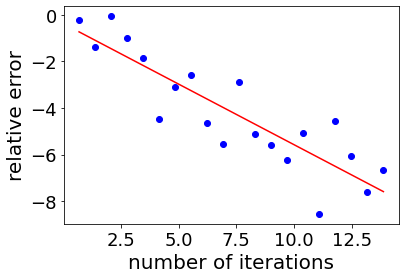

In [24]:
samp_size = [2**n for n in range(1,21)]
# equation of best fit line
b, a = polyfit(log(samp_size), log(rel_err),1)
plt.plot(log(samp_size), log(rel_err),"bo")
plt.plot(log(samp_size), b*log(samp_size) + a, 'r')
plt.xlabel("number of iterations", fontsize=20) 
plt.ylabel("relative error", fontsize=20)
plt.tick_params(labelsize=18)
plt.show()

### Plot the function  $ n \mapsto 2\pi \frac{\sqrt{\sigma^{2}_{f}}}{\sqrt{n}}$. Choose logarithm scale for both axis.

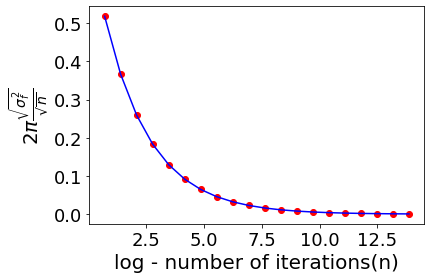

In [39]:
conv= [2*pi*sqrt(sigma)/ sqrt(n) for n in samp_size]
plt.plot(log(samp_size), conv,"or")
plt.xlabel("log - number of iterations(n)", fontsize=20) 
plt.ylabel(r"$2\pi \frac{\sqrt{\sigma^{2}_{f}}}{\sqrt{n}}$", fontsize=20)
plt.tick_params(labelsize=18)
# plt.show()

# equation of best fit line
b, a = polyfit(log(samp_size), log(conv),1)
plt.plot(log(samp_size), exp(b*log(samp_size)+a), "b")
plt.show()

###  TRY : Repeat the steps of 2) for the following (improper) intergals  $$
I_{k} = \int_{0}^{1} \frac{1}{x^{\frac{2k+1}{10}}} \quad \mbox{where k is in \{0,1,2,3,4\}}
$$


Let $\displaystyle g_k = x^{\frac{2k+1}{10}}, \; \forall k\in\{0, 1, 2, 3, 4\}$

In [108]:
k = range(0, 5)
g0 = lambda x: (x**(2*0+1)/10)
g1 = lambda x: (x**(2*1+1)/10)
g2 = lambda x: (x**(2*2+1)/10)
g3 = lambda x: (x**(2*3+1)/10)
g4 = lambda x: (x**(2*4+1)/10)

In [82]:
approx_g0 = [MC_integral(g0 ,2**n, 0, 1) for n in range(1,21)]
approx_g1 = [MC_integral(g1 ,2**n, 0, 1) for n in range(1,21)]
approx_g2 = [MC_integral(g2 ,2**n, 0, 1) for n in range(1,21)]
approx_g3 = [MC_integral(g3 ,2**n, 0, 1) for n in range(1,21)]
approx_g4 = [MC_integral(g4 ,2**n, 0, 1) for n in range(1,21)]
print(approx_g0)
print(approx_g1)
print(approx_g2)
print(approx_g3)
print(approx_g4)

[0.05321886099483279, 0.04987222083727927, 0.04571392932386994, 0.053256498787681406, 0.046447899373130486, 0.046157627685430545, 0.047611004355798306, 0.04695227474763729, 0.04982222546691282, 0.049050553091142195, 0.04923301286491525, 0.04981862910103765, 0.04941716815930297, 0.04972396985869057, 0.05017416601019503, 0.04985737455811738, 0.04995131204487885, 0.050071691464261686, 0.050036170786417256, 0.04999821365458007]
[0.0024617753003629986, 0.036211208941936766, 0.03892970106399425, 0.022077382501906762, 0.033536445161113315, 0.032739053579997, 0.02699347993926965, 0.02717060266517002, 0.02417838497656792, 0.024487375728660554, 0.025641408262055042, 0.024357139876292733, 0.024732147667934915, 0.024955157389795216, 0.02490753224009648, 0.025187523833415132, 0.025047697723758283, 0.024996631411739478, 0.024993919554355922, 0.024951750400318596]
[0.02631072968506521, 0.023499959510542547, 0.046895963578880574, 0.01160386957083711, 0.013200482418012992, 0.014422017283048979, 0.01722

For each of the approximations compute relative errors.

In [84]:
I0 = standard_integral(g0, 1000, 0, 1)
I1 = standard_integral(g1, 1000, 0, 1)
I2 = standard_integral(g2, 1000, 0, 1)
I3 = standard_integral(g3, 1000, 0, 1)
I4 = standard_integral(g4, 1000, 0, 1)
print(I0, I1, I2, I3, I4)

0.05005005005005005 0.02505007510012515 0.016716758466833515 0.012550108500195998 0.01005012520020507


In [88]:
# Relative error
rel_err0 = abs(approx_g0 - I0)/I0
rel_err1 = abs(approx_g1 - I1)/I1
rel_err2 = abs(approx_g2 - I2)/I2
rel_err3 = abs(approx_g3 - I0)/I3
rel_err4 = abs(approx_g4 - I0)/I4

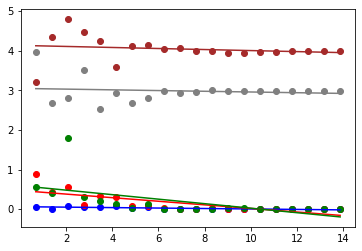

In [113]:
plt.plot(log(samp_size), rel_err0, "o", c = "blue")
plt.plot(log(samp_size), rel_err1, "o", c = "red")
plt.plot(log(samp_size), rel_err2, "o", c = "green")
plt.plot(log(samp_size), rel_err3, "o", c = "gray")
plt.plot(log(samp_size), rel_err4, "o", c = "brown")


# regression fit
rf0_slp, rf0_itcp = np.polyfit(log(samp_size), rel_err0, 1)
rf1_slp, rf1_itcp = np.polyfit(log(samp_size), rel_err1, 1)
rf2_slp, rf2_itcp = np.polyfit(log(samp_size), rel_err2, 1)
rf3_slp, rf3_itcp = np.polyfit(log(samp_size), rel_err3, 1)
rf4_slp, rf4_itcp = np.polyfit(log(samp_size), rel_err4, 1)

plt.plot(log(samp_size), rf0_slp*log(samp_size) + rf0_itcp, c = "blue")
plt.plot(log(samp_size), rf1_slp*log(samp_size) + rf1_itcp, c = "red")
plt.plot(log(samp_size), rf2_slp*log(samp_size) + rf2_itcp, c = "green")
plt.plot(log(samp_size), rf3_slp*log(samp_size) + rf3_itcp, c = "gray")
plt.plot(log(samp_size), rf4_slp*log(samp_size) + rf4_itcp, c = "brown")
plt.show()

Note that there is no convergence when $k > 2$. Let do the plotting for $k \leq 2$

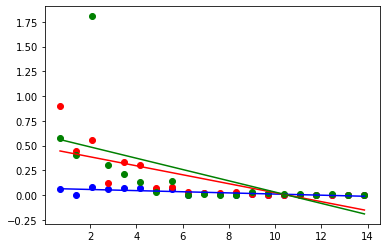

In [133]:
plt.plot(log(samp_size), rel_err0, "o", c = "blue")
plt.plot(log(samp_size), rel_err1, "o", c = "red")
plt.plot(log(samp_size), rel_err2, "o", c = "green")
plt.plot(log(samp_size), rf0_slp*log(samp_size) + rf0_itcp, c = "blue")
plt.plot(log(samp_size), rf1_slp*log(samp_size) + rf1_itcp, c = "red")
plt.plot(log(samp_size), rf2_slp*log(samp_size) + rf2_itcp, c = "green")
plt.show()